### References:<br>
<ol><li>https://www.youtube.com/watch?v=JDU3AzH3WKg</li>
</ol>

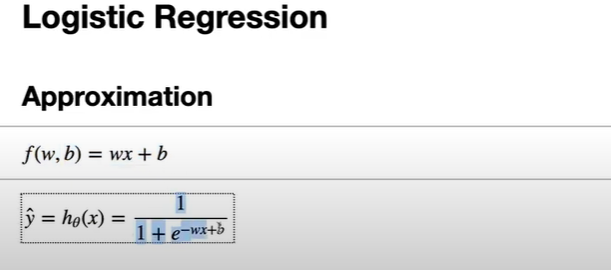

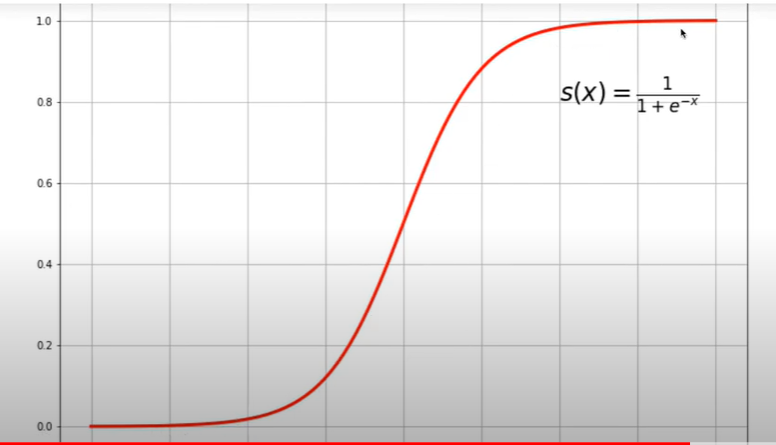

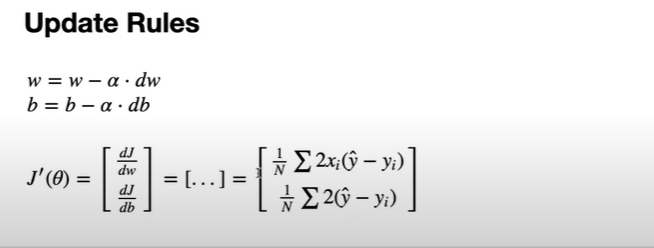

### Logistic Regression from scratch

In [1]:
import numpy as np

In [18]:
class LogisticRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        """
        X: numpy n-d vector of size m*n where m is the number of samples and n is the no. of features
        y: actual output(row vector)
        """
        n_samples, n_features = X.shape
        
        # initialize weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = ((1/n_samples)*(np.dot(X.T, y_predicted-y)))
            db = ((1/n_samples)*(np.sum(y_predicted-y)))
            
            # update weight and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def _sigmoid(self, x):
        return (1/(1+np.exp(-x)))

### Execute the model with a sample dataset from sklearn

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [20]:
# load data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1234)

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [23]:
# Evalute the model
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred)/len(y_true)
    return accuracy

In [24]:
log_regressor = LogisticRegression()
log_regressor.fit(X_train, y_train)
y_prediction = log_regressor.predict(X_test)

accuracy(y_test, y_prediction)

<ipython-input-18-5625e761069b>:38: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


0.8947368421052632